In [8]:
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
data = pd.DataFrame(pd.read_csv('advertising.csv'))
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
data.shape

(200, 4)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
# null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
# eliminate outliers using z-score
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)


           TV     Radio  Newspaper     Sales
0    0.969852  0.981522   1.778945  1.322319
1    1.197376  1.082808   0.669579  0.897515
2    1.516155  1.528463   1.783549  0.593948
3    0.052050  1.217855   1.286405  0.259834
4    0.394182  0.841614   1.281802  0.525455
..        ...       ...        ...       ...
195  1.270941  1.321031   0.771217  1.428757
196  0.617035  1.240003   1.033598  0.214489
197  0.349810  0.942899   1.111852  0.062706
198  1.594565  1.265121   1.640850  1.967398
199  0.993206  0.990165   1.005979  0.620320

[200 rows x 4 columns]


In [14]:
# eliminate outliers using z-score greater than 3
data = data[(z < 3).all(axis=1)]
data.shape


(198, 4)

## Exploratory Data Analysis

### Univariate Analysis

#### Sales (Target Variable)

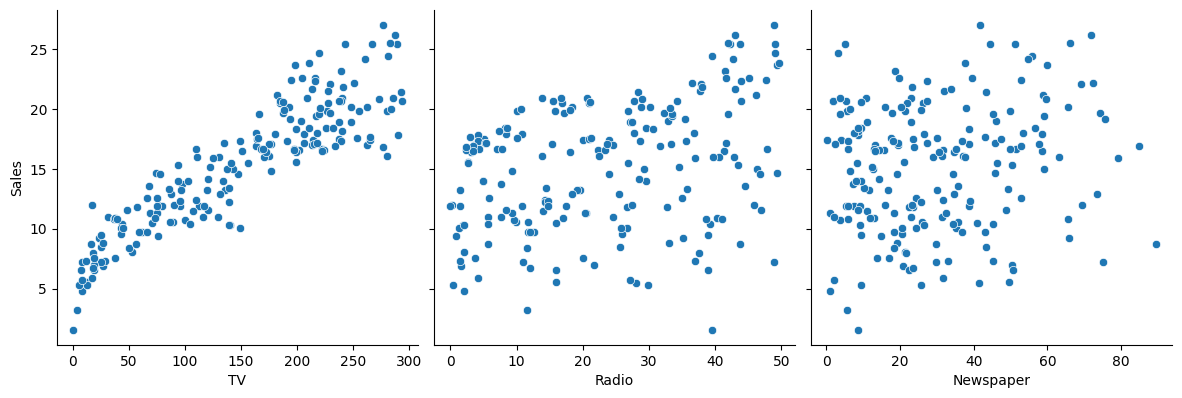

In [16]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()


* TV vs. Sales: Strong positive correlation; increased TV advertising leads to higher sales.
* Radio vs. Sales: Weak positive correlation; increased Radio advertising has a less consistent effect on sales.
* Newspaper vs. Sales: Very weak or no correlation; Newspaper advertising does not significantly impact sales.

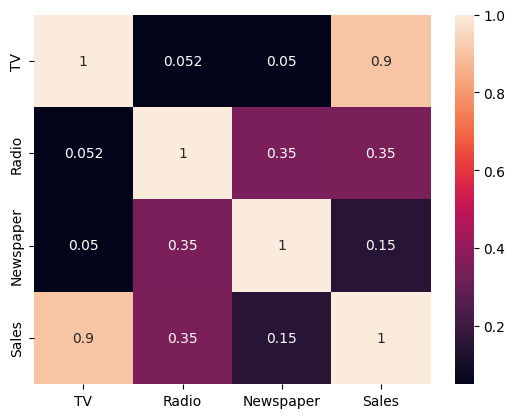

In [17]:
# correlation matrix
sns.heatmap(data.corr(), annot=True)
plt.show()

* TV and Sales: Correlation coefficient of 0.9, indicating a very strong positive correlation. This confirms that higher TV advertising expenditures are strongly associated with higher sales.
* Radio and Sales: Correlation coefficient of 0.35, indicating a moderate positive correlation. Radio advertising has a weaker but still positive association with sales.
* Newspaper and Sales: Correlation coefficient of 0.15, indicating a weak positive correlation. Newspaper advertising has a minimal impact on sales.

## Model Building

#### Sales vs. TV

In [19]:
# split data
X = data[['TV']]
y = data['Sales']


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
import statsmodels.api as sm

In [22]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [23]:
lr.params

const    7.201721
TV       0.052920
dtype: float64

In [24]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     517.9
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           3.22e-48
Time:                        17:07:25   Log-Likelihood:                -312.36
No. Observations:                 138   AIC:                             628.7
Df Residuals:                     136   BIC:                             634.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2017      0.394     18.277      0.0

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.052, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.792
Meaning that 97,2% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 7.201721 + 0.052920 \times TV $

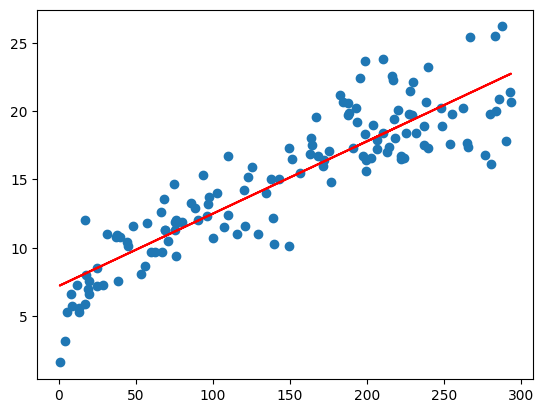

In [25]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.201721 + 0.052920*X_train, 'r')
plt.show()

## Model Evaluation

### Residual Analysis
to validate assumptions of the model

In [26]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\b_att\AppData\Local\Temp\ipykernel_11984\3003513444.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


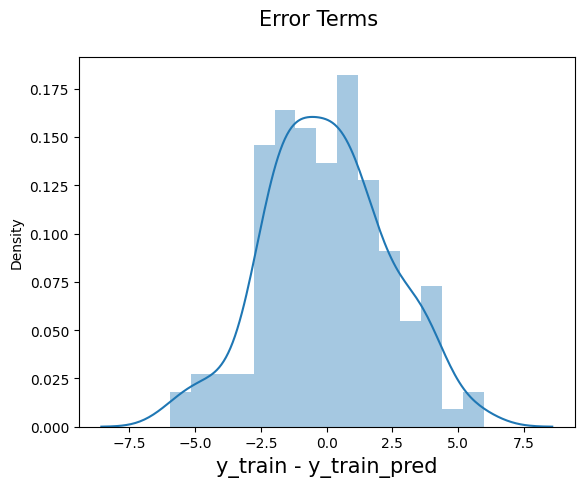

In [27]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

residuals are normally distributed

### Predictions on the Test Set

In [29]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [31]:
y_pred.head()

19     14.996868
170     9.847731
64     14.139561
177    16.208741
72      8.619982
dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.260078555722195

In [34]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8359922722386762

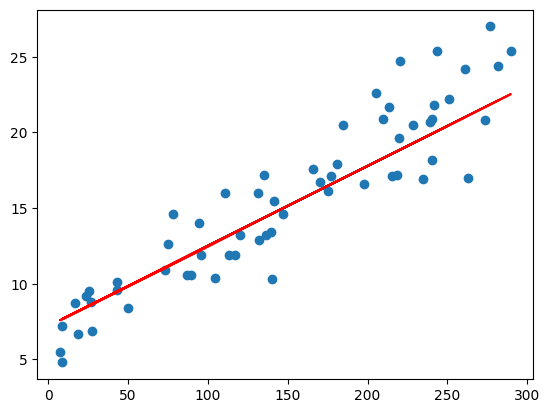

In [35]:
# visualize the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()
